## 加载库

In [8]:
import requests
from bs4 import BeautifulSoup


## 设置Cookie和Header

In [17]:
cookie = {'timestamp2': '1688092677969'}
header = {
    'authority': 'news.yiche.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'cache-control': 'max-age=0',
    'pragma': 'no-cache',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'none',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent':  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

## 请求

In [19]:
link = "https://www.toutiao.com/article/7235891710436459063/?channel=&source=search_tab"

## Page就是需要的html
page = requests.get(link, headers=header, cookies= cookie)


print(str(page.text))

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <link rel="shortcut icon" href="//sf3-cdn-tos.douyinstatic.com/obj/eden-cn/uhbfnupkbps/toutiao_favicon.ico"
    type="image/x-icon">
  <title>今日头条</title>
</head>

<body>
  <noscript>您需要允许该网站执行 JavaScript</noscript>
  <script nonce="5vU0BuKm2ipzR4TmvUMCi">
    var startTime = Date.now();
  </script>
  <script nonce="5vU0BuKm2ipzR4TmvUMCi">
    (function (w, d, u, b, n, pc, ga, ae, po, s, p, e, t, pp) { pc = 'precollect'; ga = 'getAttribute'; ae = 'addEventListener'; po = 'PerformanceObserver'; s = function (m) { p = [].slice.call(arguments); p.push(Date.now(), location.href); (m == pc ? s.p.a : s.q).push(p) }; s.q = []; s.p = { a: [] }; w[n] = s; e = document.createElement('script'); e.src = u + '?bid=' + b + '&globalName=' + n; e.crossOrigin = u.indexOf('sdk-web') > 0 ? 'anonymous' : 'use-cr

In [29]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

url = "https://www.toutiao.com/article/7235891710436459063/?channel=&source=search_tab"

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--blink-settings=imagesEnabled=false')

driver = webdriver.Chrome(options=chrome_options)
driver.get(url)

try:
    # 等待指定的元素出现
    element = WebDriverWait(driver, 60).until(
        EC.presence_of_element_located(
            (By.CSS_SELECTOR, "#root > div.article-detail-container > div.left-sidebar > div > div:nth-child(2) > div")
        )
    )
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    with open("./xhs.html", 'w') as f:
        f.write(driver.page_source)
        # 关闭浏览器驱动

    # 找到并打印点赞数量
    like_count_div = soup.find('div', class_='digg-icon')
    like_count = like_count_div.find_next_sibling('span').text
    print(f"点赞数量：{like_count}")

    # 找到并打印评论数量
    comment_count_div = soup.find('div', class_='detail-interaction-comment')
    comment_count = comment_count_div.find('span').text
    print(f"评论数量：{comment_count}")

    # 找到并打印用户主页和用户名
    user_meta_div = soup.find('div', class_='article-meta')
    user_name_span = user_meta_div.find('span', class_='name')
    user_homepage = 'www.toutiao.com/'+user_name_span.find('a')['href']
    user_name = user_name_span.text.strip()
    print(f"用户主页：{user_homepage}")
    print(f"用户名：{user_name}")

finally:
    driver.quit()


点赞数量：48
评论数量：186
用户主页：www.toutiao.com//c/user/token/MS4wLjABAAAAOQAV5Ck-XSLBOFFHlC9YxuAOYPQhAOGXUB1Cy1sb1Jo/?source=tuwen_detail
用户名：萝卜报告


<!doctype html><html lang="zh-cn"><head><title>传祺E9上市！32.98万比腾势D9还便宜？-今日头条</title><meta name="keywords" content="腾势,传祺,多功能休旅车,电动汽车,设计,美好，一直在身边,伴随成长的中国味品牌,余迪伟,比亚迪,新能源"/><meta name="description" content="而面对新兴市场的崛起，深耕MPV领域多年的广汽传祺也在5月21日正式上市了全新插混MPV--E9，主要竞争对手直接瞄准了刚刚月销破万的腾势D9。"/><meta http-equiv="Content-Security-Policy" content="upgrade-insecure-requests"/><link rel="canonical" href="https://www.toutiao.com/article/7235891710436459063/"/><link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.toutiao.com/article/7235891710436459063/"/><script type="application/ld+json">{"@context":"https://schema.org","@type":"NewsArticle","mainEntityOfPage":{"@type":"WebPage","@id":"https://www.toutiao.com/article/7235891710436459063/"},"headline":"传祺E9上市！32.98万比腾势D9还便宜？","description":"而面对新兴市场的崛起，深耕MPV领域多年的广汽传祺也在5月21日正式上市了全新插混MPV--E9，主要竞争对手直接瞄准了刚刚月销破万的腾势D9。","image":["https://p3-sign.toutiaoimg.com/motor-article-img/49db5f4b01c04953b6ef57b948508576~noop.image?_iz=58558&from=art
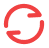

In [33]:
import requests

cookies = {
    'passport_csrf_token': '02b7b12965b97a09b9c4b399cc73126c',
    'tt_webid': '7248933611839604282',
    'ttcid': '23c752c151834b4c9518247705eaee1475',
    'local_city_cache': '%E5%8C%97%E4%BA%AC',
    'csrftoken': '4de5ffec509f0897bec2a8c7405a6906',
    '_ga': 'GA1.1.682536941.1687773904',
    's_v_web_id': 'verify_ljcp077a_5gVj3l2X_w2vI_4CQ7_9MIs_whHLJoETFebr',
    '_S_WIN_WH': '1470_809',
    '_S_DPR': '2',
    '_S_IPAD': '0',
    'msToken': 'cmrRgpCP-jsIvMo3SqJfSH8LRNrpoY1vt-za6QTTcZUfIbzW3mmRCgnUViWJPwNSZmluT4EynsRcUuh5leeoR73pJ9SIgjnEghbwEY9m7Vc=',
    '_ga_QEHZPBE5HH': 'GS1.1.1688116265.8.1.1688118100.0.0.0',
    'ttwid': '1%7C1iX7OSSDI7Lz9zV8CnApEsq_Y4FTzBlH8MjAVsz9XEc%7C1688118101%7C101b5537e40581b0ccd8b2bbe295de74d9f90e34d76ef2292ac0121da3f796e5',
    'tt_scid': 'K05thr5cM0Qgt8.qrLU6xYahmzOCt769EcXwKJauZx4kclGyh0DKLNQqXhjOntHq0094',
}

headers = {
    'authority': 'www.toutiao.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'cache-control': 'max-age=0',
    # 'cookie': 'passport_csrf_token=02b7b12965b97a09b9c4b399cc73126c; tt_webid=7248933611839604282; ttcid=23c752c151834b4c9518247705eaee1475; local_city_cache=%E5%8C%97%E4%BA%AC; csrftoken=4de5ffec509f0897bec2a8c7405a6906; _ga=GA1.1.682536941.1687773904; s_v_web_id=verify_ljcp077a_5gVj3l2X_w2vI_4CQ7_9MIs_whHLJoETFebr; _S_WIN_WH=1470_809; _S_DPR=2; _S_IPAD=0; msToken=cmrRgpCP-jsIvMo3SqJfSH8LRNrpoY1vt-za6QTTcZUfIbzW3mmRCgnUViWJPwNSZmluT4EynsRcUuh5leeoR73pJ9SIgjnEghbwEY9m7Vc=; _ga_QEHZPBE5HH=GS1.1.1688116265.8.1.1688118100.0.0.0; ttwid=1%7C1iX7OSSDI7Lz9zV8CnApEsq_Y4FTzBlH8MjAVsz9XEc%7C1688118101%7C101b5537e40581b0ccd8b2bbe295de74d9f90e34d76ef2292ac0121da3f796e5; tt_scid=K05thr5cM0Qgt8.qrLU6xYahmzOCt769EcXwKJauZx4kclGyh0DKLNQqXhjOntHq0094',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'none',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
}

params = {
    'channel': '',
    'source': 'search_tab',
}

response = requests.get('https://www.toutiao.com/article/7235891710436459063/', params=params, cookies=cookies, headers=headers)
print(str(response.text))

In [36]:
import requests

cookies = {
    'CIGUID': 'ec5339c8-0db3-4e29-8b6b-67bdff0ccb14',
    'CIGDCID': 'x4fbmGQCreeHFh6NnEw28MY5jD5p2EXt',
    'auto_id': 'd14988c50ba839e18a9d96072167a910',
    'UserGuid': 'ec5339c8-0db3-4e29-8b6b-67bdff0ccb14',
    'Hm_lvt_610fee5a506c80c9e1a46aa9a2de2e44': '1687923640',
    'selectcity': '110100',
    'selectcityid': '201',
    'selectcityName': '%E5%8C%97%E4%BA%AC',
    'locatecity': '110100',
    'bitauto_ipregion': '103.108.231.76%3A%E5%8C%97%E4%BA%AC%E5%B8%82%3B201%2C%E5%8C%97%E4%BA%AC%2Cbeijing',
    'isWebP': 'true',
    'report-cookie-id': '249625994_1688353425149',
    'Hm_lpvt_610fee5a506c80c9e1a46aa9a2de2e44': '1688353430',
}

headers = {
    'authority': 'news.yiche.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'cache-control': 'max-age=0',
    # 'cookie': 'CIGUID=ec5339c8-0db3-4e29-8b6b-67bdff0ccb14; CIGDCID=x4fbmGQCreeHFh6NnEw28MY5jD5p2EXt; auto_id=d14988c50ba839e18a9d96072167a910; UserGuid=ec5339c8-0db3-4e29-8b6b-67bdff0ccb14; Hm_lvt_610fee5a506c80c9e1a46aa9a2de2e44=1687923640; selectcity=110100; selectcityid=201; selectcityName=%E5%8C%97%E4%BA%AC; locatecity=110100; bitauto_ipregion=103.108.231.76%3A%E5%8C%97%E4%BA%AC%E5%B8%82%3B201%2C%E5%8C%97%E4%BA%AC%2Cbeijing; isWebP=true; report-cookie-id=249625994_1688353425149; Hm_lpvt_610fee5a506c80c9e1a46aa9a2de2e44=1688353430',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'none',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
}

response = requests.get('https://news.yiche.com/xinchexiaoxi/20230521/0081822289.html', cookies=cookies, headers=headers)

print(str(response.text))

<!DOCTYPE html><html lang="zh-CN"><head> <meta charset="UTF-8" />
<meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,viewport-fit=cover" />
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<meta name="renderer" content="webkit">
<meta http-equiv="Pragma" content="no-cache" />
<meta http-equiv="Cache-Control" content="no-cache" />
<meta http-equiv="x-dns-prefetch-control" content="on" />
<meta name="referrer" content="no-referrer-when-downgrade" />
<link rel="shortcut icon" type="image/x-icon" href="//static1.bitautoimg.com/yc-common/icon/favicon.ico" />
<link rel="dns-prefetch" href="//static1.bitautoimg.com " />
<link rel="dns-prefetch" href="//image.bitauto.com" />
<link rel="dns-prefetch" href="//image.bitautoimg.com" />
<link rel="dns-prefetch" href="//img1.bitautoimg.com" />
<link rel="dns-prefetch" href="//img2.bitautoimg.com" />
<link rel="dns-prefetch" href="//img3.bitautoimg.com" />
<link rel="dns-prefetch" h

In [44]:
import requests

cookies = {
    'CIGUID': 'ec5339c8-0db3-4e29-8b6b-67bdff0ccb14',
    'CIGDCID': 'x4fbmGQCreeHFh6NnEw28MY5jD5p2EXt',
    'auto_id': 'd14988c50ba839e18a9d96072167a910',
    'UserGuid': 'ec5339c8-0db3-4e29-8b6b-67bdff0ccb14',
    'Hm_lvt_610fee5a506c80c9e1a46aa9a2de2e44': '1687923640',
    'selectcity': '110100',
    'selectcityid': '201'
}

headers = {
    'authority': 'mapi.yiche.com',
    'accept': '*/*',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'content-type': 'application/json;charset=UTF-8',
    # 'cookie': 'CIGUID=ec5339c8-0db3-4e29-8b6b-67bdff0ccb14; CIGDCID=x4fbmGQCreeHFh6NnEw28MY5jD5p2EXt; auto_id=d14988c50ba839e18a9d96072167a910; UserGuid=ec5339c8-0db3-4e29-8b6b-67bdff0ccb14; Hm_lvt_610fee5a506c80c9e1a46aa9a2de2e44=1687923640; selectcity=110100; selectcityid=201; selectcityName=%E5%8C%97%E4%BA%AC; locatecity=110100; bitauto_ipregion=103.108.231.76%3A%E5%8C%97%E4%BA%AC%E5%B8%82%3B201%2C%E5%8C%97%E4%BA%AC%2Cbeijing; isWebP=true; Hm_lpvt_610fee5a506c80c9e1a46aa9a2de2e44=1688354979',
    'origin': 'https://news.yiche.com',
    'referer': 'https://news.yiche.com/xinchexiaoxi/20230521/0081822289.html',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

params = {
    'cid': '508',
    'param': '{"contentId":"82724996","contentType":"20"}',
}

response = requests.get(
    'https://mapi.yiche.com/information_api/api/v1/support/support_info',
    params=params,
    cookies=cookies,
    headers=headers,
)

print(str(response.text))

{"message":"公共参数缺失","status":"11036"}


In [46]:


import concurrent.futures
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from tqdm import tqdm

chrome_options = Options()

chrome_options.add_argument('--blink-settings=imagesEnabled=false')

def scrape_autohome_page_info(url):
    driver = webdriver.Chrome(options=chrome_options)
    driver.minimize_window()
    driver.get(url)
    WebDriverWait(driver, 15)
    page_source = driver.page_source
    print(str(page_source))
    driver.quit()
    return None
url = 'https://club.autohome.com.cn/bbs/thread/8f0903df79801be1/105449645-1.html#pvareaid=6830287'

scrape_autohome_page_info(url)



<html lang="zh-cmn-Hans"><head><script type="text/javascript" async="" src="//x.autoimg.cn/bi/common/ah_event_stats.min.js?d=20180524"></script><script type="text/javascript" src="//x.autoimg.cn/bi/common/pvevent_all_s.js"></script><script src="https://g.autoimg.cn/play/ahvp.player.2.6.47.js"></script>
  <base target="_blank">
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="X-UA-Compatible" content="ie=edge, chrome=1">
  <meta name="renderer" content="webkit">
  <link rel="dns-prefetch" href="//x.autoimg.cn">
  <link rel="dns-prefetch" href="//m1.autoimg.cn">
  <link rel="dns-prefetch" href="//msg.autohome.com.cn">
  <link rel="dns-prefetch" href="//sou.api.autohome.com.cn">
  <link rel="dns-prefetch" href="//al.autohome.com.cn">
  <link rel="dns-prefetch" href="//img.autohome.com.cn">
  <link rel="dns-prefetch" href="//www.autohome.com.cn">
  <link rel="dns-prefetch" href="//sou.autohome.com.cn">
  <link rel="shortc